# <span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#00b3e5;">Problem Statement-2 Text Analytics

<font color=darkblue>In this particular project, we are going to work on the inaugural corpora from the nltk in Python. We will be looking at the following speeches of the Presidents of the United States of America:
* **President Franklin D. Roosevelt in 1941**
* **President John F. Kennedy in 1961**
* **President Richard Nixon in 1973**

**Code Snippet to extract the three speeches:**<br>
import nltk<br>
nltk.download('inaugural')<br>
from nltk.corpus import inaugural<br>
inaugural.fileids()<br>
inaugural.raw('1941-Roosevelt.txt')<br>
inaugural.raw('1961-Kennedy.txt')<br>
inaugural.raw('1973-Nixon.txt') </font>
    

In [1]:
# Import Neccessary packages
import os

# supress warnings
import warnings
warnings.filterwarnings('ignore')

#Importing Libraries
import numpy as np 
import pandas as pd 

# For Visualisation import ploting libraries
import matplotlib.pyplot as plt
%matplotlib inline 
#importing seaborn for statistical plots
import seaborn as sns

import re # this is the regular expression library which helps us manipulate text (strings) fairly easily and intuitively
import nltk # this is the Natural Language Tool Kit which contains a lot of functionalities for text analytics
import string # this is used for string manipulations
from nltk.corpus import stopwords  
from nltk.tokenize import word_tokenize  

In [2]:
nltk.download('inaugural')
from nltk.corpus import inaugural
inaugural.fileids()
Speech_1 = inaugural.raw('1941-Roosevelt.txt')
Speech_2 = inaugural.raw('1961-Kennedy.txt')
Speech_3 = inaugural.raw('1973-Nixon.txt')

[nltk_data] Downloading package inaugural to
[nltk_data]     C:\Users\srika\AppData\Roaming\nltk_data...
[nltk_data]   Package inaugural is already up-to-date!


In [3]:
Speech_1

'On each national day of inauguration since 1789, the people have renewed their sense of dedication to the United States.\n\nIn Washington\'s day the task of the people was to create and weld together a nation.\n\nIn Lincoln\'s day the task of the people was to preserve that Nation from disruption from within.\n\nIn this day the task of the people is to save that Nation and its institutions from disruption from without.\n\nTo us there has come a time, in the midst of swift happenings, to pause for a moment and take stock -- to recall what our place in history has been, and to rediscover what we are and what we may be. If we do not, we risk the real peril of inaction.\n\nLives of nations are determined not by the count of years, but by the lifetime of the human spirit. The life of a man is three-score years and ten: a little more, a little less. The life of a nation is the fullness of the measure of its will to live.\n\nThere are men who doubt this. There are men who believe that democr

In [4]:
Speech_2

'Vice President Johnson, Mr. Speaker, Mr. Chief Justice, President Eisenhower, Vice President Nixon, President Truman, reverend clergy, fellow citizens, we observe today not a victory of party, but a celebration of freedom -- symbolizing an end, as well as a beginning -- signifying renewal, as well as change. For I have sworn I before you and Almighty God the same solemn oath our forebears l prescribed nearly a century and three quarters ago.\n\nThe world is very different now. For man holds in his mortal hands the power to abolish all forms of human poverty and all forms of human life. And yet the same revolutionary beliefs for which our forebears fought are still at issue around the globe -- the belief that the rights of man come not from the generosity of the state, but from the hand of God.\n\nWe dare not forget today that we are the heirs of that first revolution. Let the word go forth from this time and place, to friend and foe alike, that the torch has been passed to a new gener

In [5]:
Speech_3

'Mr. Vice President, Mr. Speaker, Mr. Chief Justice, Senator Cook, Mrs. Eisenhower, and my fellow citizens of this great and good country we share together:\n\nWhen we met here four years ago, America was bleak in spirit, depressed by the prospect of seemingly endless war abroad and of destructive conflict at home.\n\nAs we meet here today, we stand on the threshold of a new era of peace in the world.\n\nThe central question before us is: How shall we use that peace? Let us resolve that this era we are about to enter will not be what other postwar periods have so often been: a time of retreat and isolation that leads to stagnation at home and invites new danger abroad.\n\nLet us resolve that this will be what it can become: a time of great responsibilities greatly borne, in which we renew the spirit and the promise of America as we enter our third century as a nation.\n\nThis past year saw far-reaching results from our new policies for peace. By continuing to revitalize our traditional

### <span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#00b3e5;">2.1	Find the number of characters, words and sentences for the mentioned documents. (Hint: use .words(), .raw(), .sent() for extracting counts)

In [6]:
#To find the number of characters,words and sentences:
speech = ['1941-Roosevelt.txt','1961-Kennedy.txt','1973-Nixon.txt']
for fileid in speech:
    num_chars = len(inaugural.raw(fileid))
    num_words = len(inaugural.words(fileid))
    num_sents = len(inaugural.sents(fileid))
    print(pd.DataFrame({fileid:[num_chars,num_words,num_sents]},index=['Character','Words','Sentences']))

           1941-Roosevelt.txt
Character                7571
Words                    1536
Sentences                  68
           1961-Kennedy.txt
Character              7618
Words                  1546
Sentences                52
           1973-Nixon.txt
Character            9991
Words                2028
Sentences              69


### <span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#00b3e5;">2.2 Remove all the stopwords from the three speeches.

In [7]:
#Add Special character '--' to the existing punctuation
special_characters=['--'] + list(string.punctuation)
# Assign stopwords and special characters to new variable
stop = stopwords.words('english') + special_characters
#Convert all the words to lowercase and store it in a new variables
all_words_speech1 = (w.lower() for w in inaugural.words(fileids='1941-Roosevelt.txt'))
all_words_speech2 = (w.lower() for w in inaugural.words(fileids='1961-Kennedy.txt'))
all_words_speech3 = (w.lower() for w in inaugural.words(fileids='1973-Nixon.txt'))
#Remove stopwords and special characters for all the three speeches
all_words_clean_speech1 = [word for word in all_words_speech1 if word not in stop]
all_words_clean_speech2 = [word for word in all_words_speech2 if word not in stop]
all_words_clean_speech3 = [word for word in all_words_speech3 if word not in stop]


In [8]:
all_words_clean_speech1

['national',
 'day',
 'inauguration',
 'since',
 '1789',
 'people',
 'renewed',
 'sense',
 'dedication',
 'united',
 'states',
 'washington',
 'day',
 'task',
 'people',
 'create',
 'weld',
 'together',
 'nation',
 'lincoln',
 'day',
 'task',
 'people',
 'preserve',
 'nation',
 'disruption',
 'within',
 'day',
 'task',
 'people',
 'save',
 'nation',
 'institutions',
 'disruption',
 'without',
 'us',
 'come',
 'time',
 'midst',
 'swift',
 'happenings',
 'pause',
 'moment',
 'take',
 'stock',
 'recall',
 'place',
 'history',
 'rediscover',
 'may',
 'risk',
 'real',
 'peril',
 'inaction',
 'lives',
 'nations',
 'determined',
 'count',
 'years',
 'lifetime',
 'human',
 'spirit',
 'life',
 'man',
 'three',
 'score',
 'years',
 'ten',
 'little',
 'little',
 'less',
 'life',
 'nation',
 'fullness',
 'measure',
 'live',
 'men',
 'doubt',
 'men',
 'believe',
 'democracy',
 'form',
 'government',
 'frame',
 'life',
 'limited',
 'measured',
 'kind',
 'mystical',
 'artificial',
 'fate',
 'unexplai

In [9]:
all_words_clean_speech2

['vice',
 'president',
 'johnson',
 'mr',
 'speaker',
 'mr',
 'chief',
 'justice',
 'president',
 'eisenhower',
 'vice',
 'president',
 'nixon',
 'president',
 'truman',
 'reverend',
 'clergy',
 'fellow',
 'citizens',
 'observe',
 'today',
 'victory',
 'party',
 'celebration',
 'freedom',
 'symbolizing',
 'end',
 'well',
 'beginning',
 'signifying',
 'renewal',
 'well',
 'change',
 'sworn',
 'almighty',
 'god',
 'solemn',
 'oath',
 'forebears',
 'l',
 'prescribed',
 'nearly',
 'century',
 'three',
 'quarters',
 'ago',
 'world',
 'different',
 'man',
 'holds',
 'mortal',
 'hands',
 'power',
 'abolish',
 'forms',
 'human',
 'poverty',
 'forms',
 'human',
 'life',
 'yet',
 'revolutionary',
 'beliefs',
 'forebears',
 'fought',
 'still',
 'issue',
 'around',
 'globe',
 'belief',
 'rights',
 'man',
 'come',
 'generosity',
 'state',
 'hand',
 'god',
 'dare',
 'forget',
 'today',
 'heirs',
 'first',
 'revolution',
 'let',
 'word',
 'go',
 'forth',
 'time',
 'place',
 'friend',
 'foe',
 'alike'

In [10]:
all_words_clean_speech3

['mr',
 'vice',
 'president',
 'mr',
 'speaker',
 'mr',
 'chief',
 'justice',
 'senator',
 'cook',
 'mrs',
 'eisenhower',
 'fellow',
 'citizens',
 'great',
 'good',
 'country',
 'share',
 'together',
 'met',
 'four',
 'years',
 'ago',
 'america',
 'bleak',
 'spirit',
 'depressed',
 'prospect',
 'seemingly',
 'endless',
 'war',
 'abroad',
 'destructive',
 'conflict',
 'home',
 'meet',
 'today',
 'stand',
 'threshold',
 'new',
 'era',
 'peace',
 'world',
 'central',
 'question',
 'us',
 'shall',
 'use',
 'peace',
 'let',
 'us',
 'resolve',
 'era',
 'enter',
 'postwar',
 'periods',
 'often',
 'time',
 'retreat',
 'isolation',
 'leads',
 'stagnation',
 'home',
 'invites',
 'new',
 'danger',
 'abroad',
 'let',
 'us',
 'resolve',
 'become',
 'time',
 'great',
 'responsibilities',
 'greatly',
 'borne',
 'renew',
 'spirit',
 'promise',
 'america',
 'enter',
 'third',
 'century',
 'nation',
 'past',
 'year',
 'saw',
 'far',
 'reaching',
 'results',
 'new',
 'policies',
 'peace',
 'continuing',


### <span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#00b3e5;">2.3	Which word occurs the most number of times in his inaugural address for each president? Mention the top three words. (After removing the stopwords)

In [11]:
# Most Frequent words in 1941-Roosevelt Speech
df1 = nltk.FreqDist(all_words_clean_speech1)
df1 = pd.DataFrame.from_dict(df1,orient='index')
df1 = df1.rename(columns={0:'Count'})
df1.sort_values(by=['Count'],ascending=False, inplace=True)
print("Most Frequent words in 1941-Roosevelt Speech")
df1.head(5)

Most Frequent words in 1941-Roosevelt Speech


,Count
nation,12
know,10
spirit,9
democracy,9
life,9


In [12]:
# Most Frequent words in 1961-Kennedy Speech
df2 = nltk.FreqDist(all_words_clean_speech2)
df2 = pd.DataFrame.from_dict(df2,orient='index')
df2 = df2.rename(columns={0:'Count'})
df2.sort_values(by=['Count'],ascending=False, inplace=True)
print("Most Frequent words in 1961-Kennedy Speech")
df2.head(5)

Most Frequent words in 1961-Kennedy Speech


,Count
let,16
us,12
sides,8
world,8
new,7


In [13]:
# Most Frequent words in 1973-Nixon Speech
df3 = nltk.FreqDist(all_words_clean_speech3)
df3 = pd.DataFrame.from_dict(df3,orient='index')
df3 = df3.rename(columns={'index':'Words',0:'Count'})
df3.sort_values(by=['Count'],ascending=False, inplace=True)
print("Most Frequent words in 1973-Nixon Speech")
df3.head(5)

Most Frequent words in 1973-Nixon Speech


,Count
us,26
let,22
america,21
peace,19
world,18


### <span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#00b3e5;">2.4	Plot the word cloud of each of the three speeches. (After removing the stopwords).

In [14]:
wc_a = ' '.join(all_words_clean_speech1)
wc_b = ' '.join(all_words_clean_speech2)
wc_c = ' '.join(all_words_clean_speech3)

Word Cloud for 1941-Roosevelt Speech (after cleaning)!!


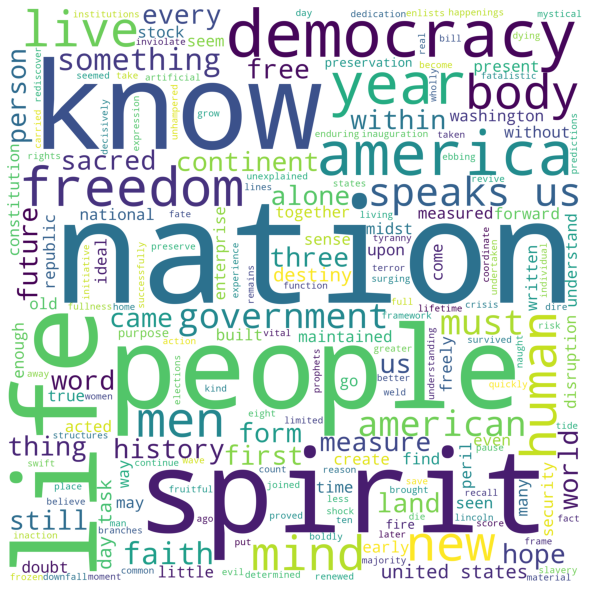

In [15]:
# Word Cloud for 1941-Roosevelt Speech
from wordcloud import WordCloud
wordcloud = WordCloud(width = 3000, height = 3000, 
                background_color ='white', 
                min_font_size = 10, random_state=27).generate(wc_a) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off")
plt.xlabel('Word Cloud')
plt.tight_layout(pad = 0) 

print("Word Cloud for 1941-Roosevelt Speech (after cleaning)!!")
plt.show()

Word Cloud for 1961-Kennedy Speech (after cleaning)!!


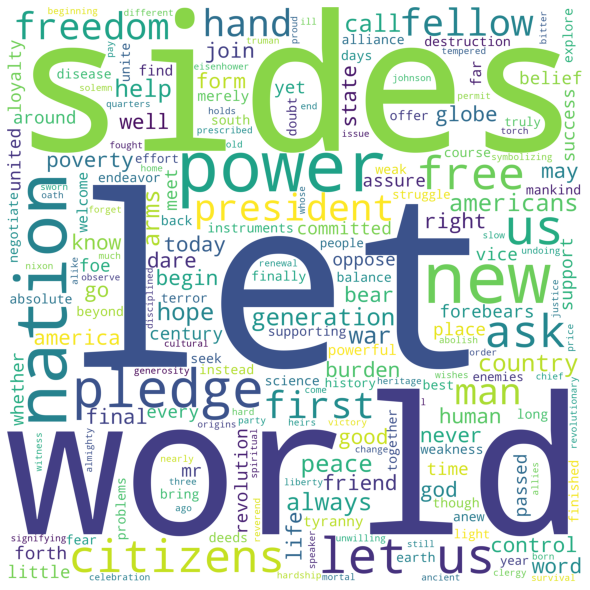

In [16]:
# Word Cloud for 1961-Kennedy Speech
from wordcloud import WordCloud
wordcloud = WordCloud(width = 3000, height = 3000, 
                background_color ='white', 
                min_font_size = 10, random_state=27).generate(wc_b) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off")
plt.xlabel('Word Cloud')
plt.tight_layout(pad = 0) 

print("Word Cloud for 1961-Kennedy Speech (after cleaning)!!")
plt.show()

Word Cloud for 1973-Nixon Speech (after cleaning)!!


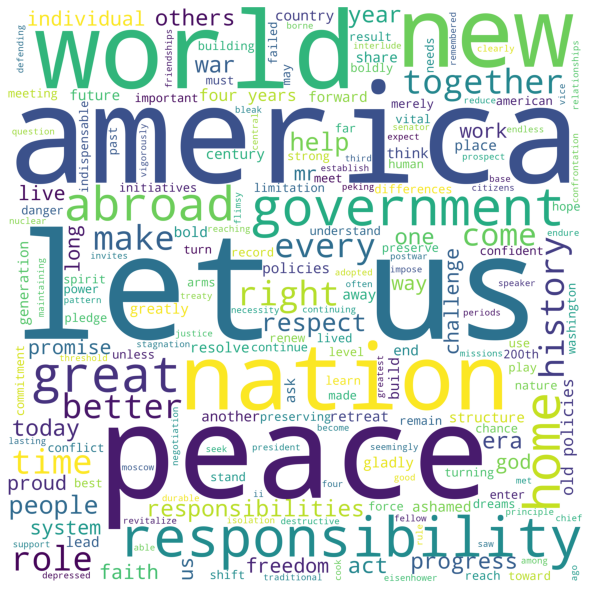

In [17]:
# Word Cloud for 1973-Nixon Speech
from wordcloud import WordCloud
wordcloud = WordCloud(width = 3000, height = 3000, 
                background_color ='white', 
                min_font_size = 10, random_state=27).generate(wc_c) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off")
plt.xlabel('Word Cloud')
plt.tight_layout(pad = 0) 

print("Word Cloud for 1973-Nixon Speech (after cleaning)!!")
plt.show()
